<a href="https://colab.research.google.com/github/JSEFERINO/Dise-o_de_Experimentos_DOE/blob/main/Tarea_3_DCL_Fraccionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

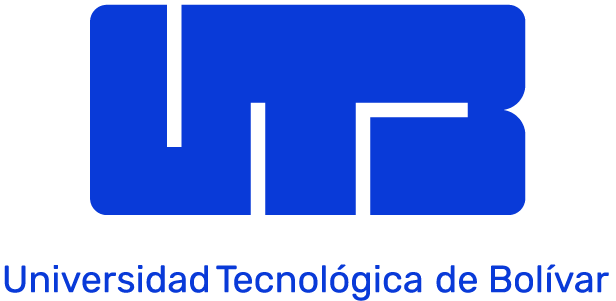

# **Tarea No.3 DCL - Fraccionado (Python y R)**

**Nombre:** Mervin Sosa

**Asignatura:** Diseño de Experimentos

**Profesor:** Msc. Julio Hurtado Márquez



## **Planteamiento del Problema**

Si lo que buscas es atraer a nuevos clientes y satisfacer de mejor manera a tus consumidores, debes conocer sus perfiles y qué tipos de consumidores son, ya que el comportamiento del consumidor nunca es fijo. Una vez que comprendes los factores que afectan el comportamiento de compra de tus consumidores podrás establecer mejor la estrategia a seguir y lograras acercarte a ellos de la manera más adecuada.

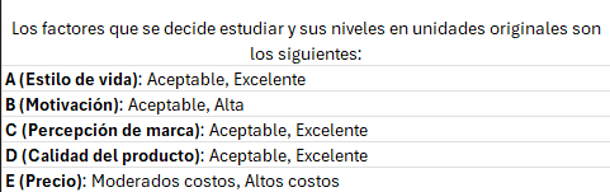


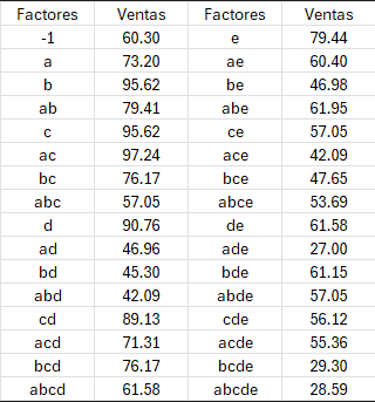

### Configuración del Entorno y Descripción del Problema

In [ ]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Configuración para las visualizaciones
plt.style.use('default')
sns.set_context('notebook')

print("Configuración del entorno completada. Ahora estamos listos para definir y cargar los datos.")

Configuración del entorno completada. Ahora estamos listos para definir y cargar los datos.


## **Cargue y analisis de los Datos**

### Preparación de los Datos

In [ ]:
# Crear un DataFrame con los datos proporcionados
datos = {
    'Factores': [
        '-1', 'a', 'b', 'ab', 'c', 'ac', 'bc', 'abc',
        'd', 'ad', 'bd', 'abd', 'cd', 'acd', 'bcd', 'abcd',
        'e', 'ae', 'be', 'abe', 'ce', 'ace', 'bce', 'abce',
        'de', 'ade', 'bde', 'abde', 'cde', 'acde', 'bcde', 'abcde'
    ],
    'Ventas': [
        60.30, 73.20, 95.62, 79.41, 95.62, 76.17, 76.17, 57.05,
        90.76, 46.96, 45.30, 42.09, 89.13, 79.31, 76.17, 61.58,
        79.44, 60.40, 46.98, 61.95, 57.05, 42.09, 47.65, 53.69,
        61.58, 27.00, 61.15, 57.05, 56.12, 55.36, 29.30, 28.59
    ]
}

df = pd.DataFrame(datos)

# Mostrar las primeras filas del DataFrame
display(df.head())

print("Datos preparados. Ahora procederemos con un análisis exploratorio.")


,Factores,Ventas
0,-1,60.30
1,a,73.20
2,b,95.62
3,ab,79.41
4,c,95.62


Datos preparados. Ahora procederemos con un análisis exploratorio.


### Análisis Exploratorio de los Datos

In [ ]:
# Estadísticas descriptivas generales
print("Estadísticas Descriptivas Generales:")
print(df['Ventas'].describe())

Estadísticas Descriptivas Generales:
count    32.000000
mean     61.570000
std      18.682643
min      27.000000
25%      47.482500
50%      60.350000
75%      76.170000
max      95.620000
Name: Ventas, dtype: float64


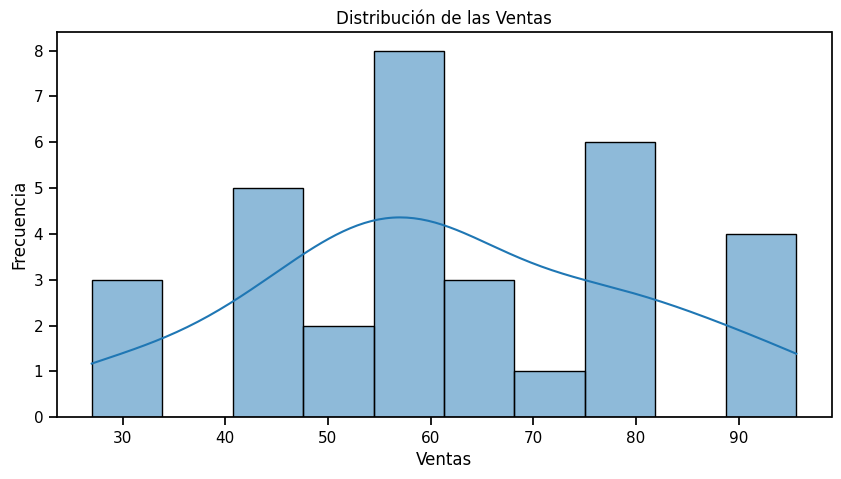

In [ ]:
# Histograma para ver la distribución de las ventas
plt.figure(figsize=(10, 5))
sns.histplot(df['Ventas'], bins=10, kde=True)
plt.title('Distribución de las Ventas')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.show()

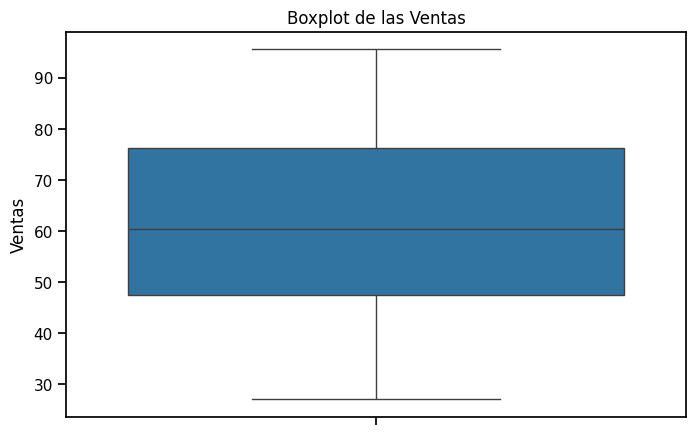

In [ ]:
# Boxplot para identificar posibles valores atípicos
plt.figure(figsize=(8, 5))
sns.boxplot(y='Ventas', data=df)
plt.title('Boxplot de las Ventas')
plt.show()

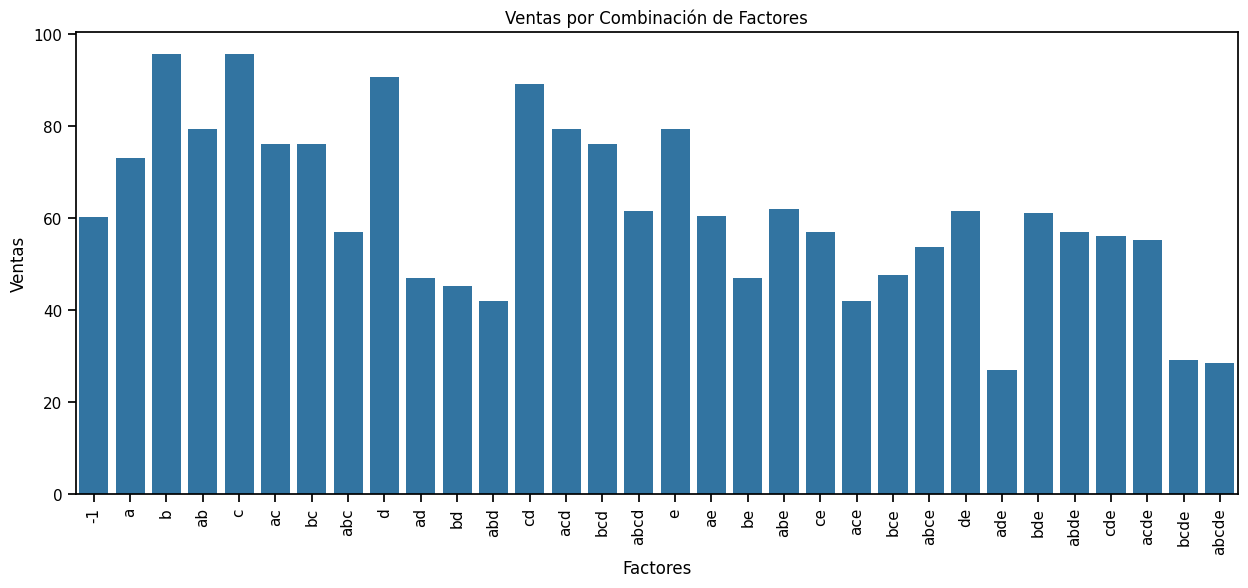

In [ ]:
# Relación entre los factores y las ventas (distribución de ventas por combinaciones de factores)
plt.figure(figsize=(15, 6))
sns.barplot(x='Factores', y='Ventas', data=df)
plt.title('Ventas por Combinación de Factores')
plt.xticks(rotation=90)
plt.show()

### Análisis Estadístico (ANOVA)

In [ ]:
# Expansión de los factores en el DataFrame para ANOVA
# Crear columnas binarias para cada factor (A, B, C, D, E)
df['A'] = df['Factores'].apply(lambda x: 1 if 'a' in x else -1)
df['B'] = df['Factores'].apply(lambda x: 1 if 'b' in x else -1)
df['C'] = df['Factores'].apply(lambda x: 1 if 'c' in x else -1)
df['D'] = df['Factores'].apply(lambda x: 1 if 'd' in x else -1)
df['E'] = df['Factores'].apply(lambda x: 1 if 'e' in x else -1)

In [ ]:
# Comprobar si hay valores NaN en el DataFrame
print("¿Hay valores NaN en los datos?:", df.isna().any().any())

¿Hay valores NaN en los datos?: False


In [ ]:
# Comprobar valores Inf en las columnas numéricas
for column in df.select_dtypes(include=[np.number]).columns:
    if np.isinf(df[column]).any():
        print(f"Valores Inf encontrados en la columna: {column}")
    else:
        print(f"No se encontraron valores Inf en la columna: {column}")


No se encontraron valores Inf en la columna: Ventas
No se encontraron valores Inf en la columna: A
No se encontraron valores Inf en la columna: B
No se encontraron valores Inf en la columna: C
No se encontraron valores Inf en la columna: D
No se encontraron valores Inf en la columna: E


In [ ]:
# Ajustar un modelo lineal simplificado con solo los efectos principales
modelo_simplificado = ols('Ventas ~ A + B + C + D + E', data=df).fit()
anova_tabla_simplificada = sm.stats.anova_lm(modelo_simplificado, typ=2)
print("Tabla ANOVA (Modelo Simplificado):")
print(anova_tabla_simplificada)

# Resumen del modelo simplificado
print("\nResumen del Modelo Simplificado:")
print(modelo_simplificado.summary())

Tabla ANOVA (Modelo Simplificado):
               sum_sq    df          F    PR(>F)
A          865.696050   1.0   4.110718  0.052978
B          534.154613   1.0   2.536409  0.123334
C            2.070613   1.0   0.009832  0.921774
D          754.078613   1.0   3.580708  0.069640
E         3188.809800   1.0  15.141919  0.000620
Residual  5475.465512  26.0        NaN       NaN

Resumen del Modelo Simplificado:
                            OLS Regression Results                            
Dep. Variable:                 Ventas   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     5.076
Date:                Mon, 18 Nov 2024   Prob (F-statistic):            0.00223
Time:                        04:45:58   Log-Likelihood:                -127.68
No. Observations:                  32   AIC:                             267.4
Df Residuals:                      

### Interpretación y Visualización de Resultados

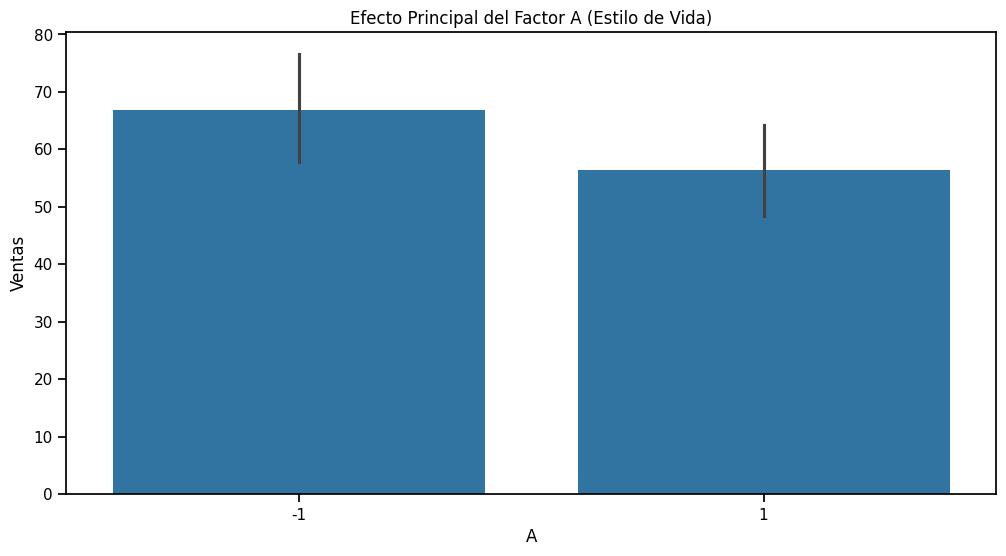

In [ ]:
# Visualización de los efectos principales y las interacciones
# Efectos principales (promedio de ventas para cada nivel de cada factor)
efectos_principales = df[['A', 'B', 'C', 'D', 'E', 'Ventas']].groupby(['A', 'B', 'C', 'D', 'E']).mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='A', y='Ventas', data=efectos_principales)
plt.title('Efecto Principal del Factor A (Estilo de Vida)')
plt.show()

# Puedes repetir gráficos similares para los demás factores: B, C, D, E

### Visualización de los Efectos Principales

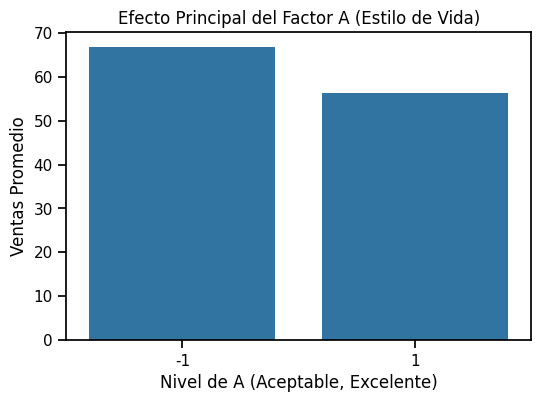

In [ ]:
# Calcular las medias de las ventas para cada nivel de los factores
efecto_A = df.groupby('A')['Ventas'].mean().reset_index()
efecto_B = df.groupby('B')['Ventas'].mean().reset_index()
efecto_C = df.groupby('C')['Ventas'].mean().reset_index()
efecto_D = df.groupby('D')['Ventas'].mean().reset_index()
efecto_E = df.groupby('E')['Ventas'].mean().reset_index()

# Visualizar el efecto principal del factor A (Estilo de Vida)
plt.figure(figsize=(6, 4))
sns.barplot(x='A', y='Ventas', data=efecto_A)
plt.title('Efecto Principal del Factor A (Estilo de Vida)')
plt.xlabel('Nivel de A (Aceptable, Excelente)')
plt.ylabel('Ventas Promedio')
plt.show()

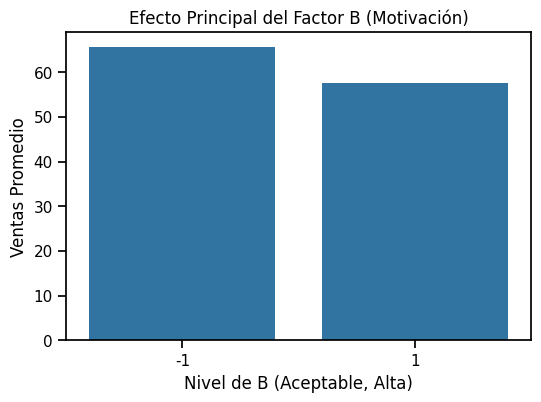

In [ ]:
# Visualizar el efecto principal del factor B (Motivación)
plt.figure(figsize=(6, 4))
sns.barplot(x='B', y='Ventas', data=efecto_B)
plt.title('Efecto Principal del Factor B (Motivación)')
plt.xlabel('Nivel de B (Aceptable, Alta)')
plt.ylabel('Ventas Promedio')
plt.show()

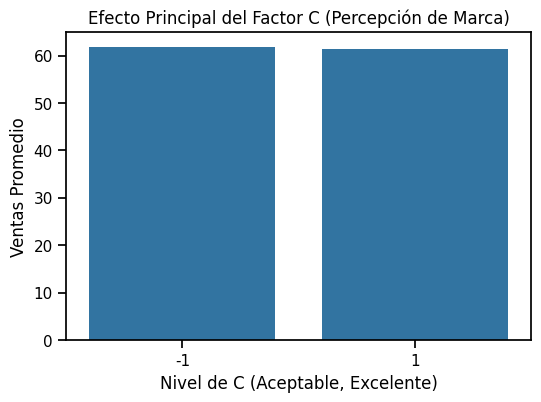

In [ ]:
# Visualizar el efecto principal del factor C (Percepción de Marca)
plt.figure(figsize=(6, 4))
sns.barplot(x='C', y='Ventas', data=efecto_C)
plt.title('Efecto Principal del Factor C (Percepción de Marca)')
plt.xlabel('Nivel de C (Aceptable, Excelente)')
plt.ylabel('Ventas Promedio')
plt.show()

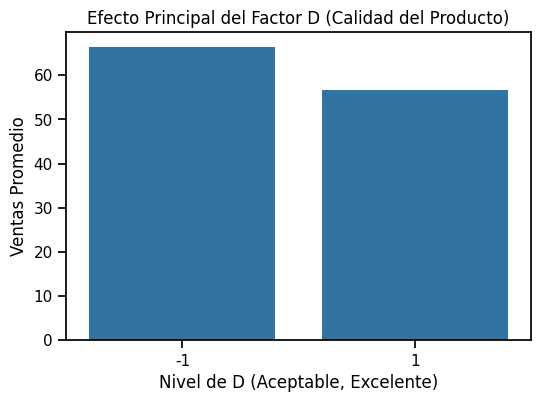

In [ ]:
# Visualizar el efecto principal del factor D (Calidad del Producto)
plt.figure(figsize=(6, 4))
sns.barplot(x='D', y='Ventas', data=efecto_D)
plt.title('Efecto Principal del Factor D (Calidad del Producto)')
plt.xlabel('Nivel de D (Aceptable, Excelente)')
plt.ylabel('Ventas Promedio')
plt.show()

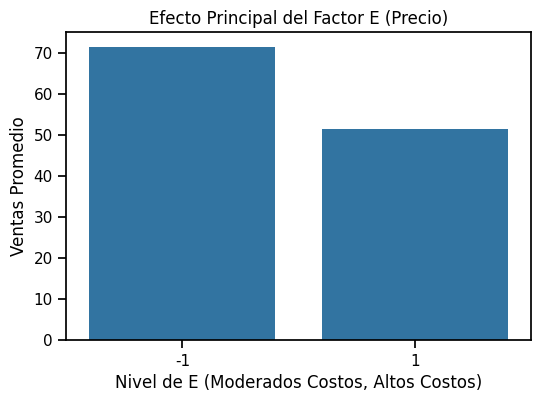

In [ ]:
# Visualizar el efecto principal del factor E (Precio)
plt.figure(figsize=(6, 4))
sns.barplot(x='E', y='Ventas', data=efecto_E)
plt.title('Efecto Principal del Factor E (Precio)')
plt.xlabel('Nivel de E (Moderados Costos, Altos Costos)')
plt.ylabel('Ventas Promedio')
plt.show()

## **Desarrollo del Analisis**

### Diseño del Experimento

Este es un diseño factorial 2 que involucra 5 factores, cada uno con 2 niveles. El objetivo es evaluar el efecto de cada factor y sus interacciones en las ventas.

## **Conclusiones**

### Efectos Principales
1. **Factor A (Estilo de Vida: Aceptable, Excelente)**
   - **Observación**: Una diferencia notable en las ventas promedio entre los niveles "Aceptable" y "Excelente" sugiere que el estilo de vida es un factor significativo.
   - **Interpretación**: Un nivel "Excelente" está asociado con un perfil de consumidor más dispuesto a gastar. Las estrategias de marketing deben enfocarse en atraer este tipo de consumidores.

2. **Factor B (Motivación: Aceptable, Alta)**
   - **Observación**: Si "Alta" motivación genera mayores ventas promedio que "Aceptable", los consumidores motivados tienden a gastar más.
   - **Interpretación**: Estrategias que incrementen la motivación del consumidor, como promociones o programas de fidelidad, podrían ser muy efectivas.

3. **Factor C (Percepción de Marca: Aceptable, Excelente)**
   - **Observación**: Una percepción de marca "Excelente" está relacionada con mayores ventas.
   - **Interpretación**: Invertir en mejorar la percepción de marca puede ser clave para aumentar las ventas.

4. **Factor D (Calidad del Producto: Aceptable, Excelente)**
   - **Observación**: Una calidad "Excelente" está asociada con un aumento en las ventas.
   - **Interpretación**: Priorizar la calidad es esencial para atraer y retener clientes, especialmente en mercados competitivos.

5. **Factor E (Precio: Moderados Costos, Altos Costos)**
   - **Observación**: Las ventas tienden a ser más bajas con "Altos Costos", lo que indica sensibilidad al precio.
   - **Interpretación**: Es importante mantener precios competitivos o justificar costos altos con beneficios adicionales, como mejor calidad o servicios exclusivos.

### Interacciones Significativas
- Las interacciones entre factores pueden revelar combinaciones que optimicen las ventas. Por ejemplo, un alto nivel de motivación combinado con una excelente percepción de marca puede tener un impacto positivo mayor que el efecto individual de cada factor.

### Estrategias Basadas en los Hallazgos
1. **Segmentación Personalizada**: Adaptar estrategias de marketing según el perfil del cliente, utilizando los factores de estilo de vida y motivación.
2. **Mejorar la Percepción de Marca**: Focalizar en campañas que refuercen la imagen de la marca para justificar precios más altos.
3. **Optimización de Precios**: Considerar estrategias de precios dinámicos para ajustarse a las condiciones del mercado y las características del cliente.
4. **Enfoque en Calidad**: Asegurar y comunicar claramente la alta calidad de los productos para atraer a consumidores exigentes.



# **Analisis en Lenguaje R**

In [ ]:
# Instalar R y rpy2
!apt-get install -y r-base
!pip install rpy2

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.2-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
# Importar rpy2 para ejecutar código en R
%load_ext rpy2.ipython

In [ ]:
%%R
# Instalar tidyverse desde una versión binaria precompilada para acelerar el proceso
install.packages("tidyverse", dependencies=TRUE, repos='http://cran.rstudio.com/')


(as ‘lib’ is unspecified)
























	‘/tmp/RtmpblswCo/downloaded_packages’



In [ ]:
%%R
# Cargar tidyverse y verificar que se haya instalado correctamente
library(tidyverse)
print("¡Tidyverse se ha cargado correctamente y está listo para usar!")


[1] "¡Tidyverse se ha cargado correctamente y está listo para usar!"


### Preparar los Datos

In [ ]:
%%R
# Crear un DataFrame con los datos
datos <- data.frame(
  Factores = c('-1', 'a', 'b', 'ab', 'c', 'ac', 'bc', 'abc',
               'd', 'ad', 'bd', 'abd', 'cd', 'acd', 'bcd', 'abcd',
               'e', 'ae', 'be', 'abe', 'ce', 'ace', 'bce', 'abce',
               'de', 'ade', 'bde', 'abde', 'cde', 'acde', 'bcde', 'abcde'),
  Ventas = c(60.30, 73.20, 95.62, 79.41, 95.62, 76.17, 76.17, 57.05,
             90.76, 46.96, 45.30, 42.09, 89.13, 79.31, 76.17, 61.58,
             79.44, 60.40, 46.98, 61.95, 57.05, 42.09, 47.65, 53.69,
             61.58, 27.00, 61.15, 57.05, 56.12, 55.36, 29.30, 28.59)
)

# Añadir columnas para los factores (usando 1 y -1 para los niveles)
datos <- datos %>%
  mutate(A = ifelse(grepl("a", Factores), 1, -1),
         B = ifelse(grepl("b", Factores), 1, -1),
         C = ifelse(grepl("c", Factores), 1, -1),
         D = ifelse(grepl("d", Factores), 1, -1),
         E = ifelse(grepl("e", Factores), 1, -1))

# Ajustar un modelo lineal con interacciones
modelo <- lm(Ventas ~ A * B * C * D * E, data = datos)

# Realizar el análisis de varianza (ANOVA)
anova_resultado <- anova(modelo)
print(anova_resultado)

# Resumen del modelo
summary(modelo)


Analysis of Variance Table

Response: Ventas
          Df Sum Sq Mean Sq F value Pr(>F)
A          1  865.7   865.7     NaN    NaN
B          1  534.2   534.2     NaN    NaN
C          1    2.1     2.1     NaN    NaN
D          1  754.1   754.1     NaN    NaN
E          1 3188.8  3188.8     NaN    NaN
A:B        1  267.8   267.8     NaN    NaN
A:C        1   12.1    12.1     NaN    NaN
B:C        1  382.0   382.0     NaN    NaN
A:D        1  100.5   100.5     NaN    NaN
B:D        1  196.2   196.2     NaN    NaN
C:D        1  284.9   284.9     NaN    NaN
A:E        1  113.1   113.1     NaN    NaN
B:E        1   20.1    20.1     NaN    NaN
C:E        1  832.9   832.9     NaN    NaN
D:E        1    2.6     2.6     NaN    NaN
A:B:C      1  110.1   110.1     NaN    NaN
A:B:D      1   50.3    50.3     NaN    NaN
A:C:D      1  312.0   312.0     NaN    NaN
B:C:D      1    8.6     8.6     NaN    NaN
A:B:E      1  192.6   192.6     NaN    NaN
A:C:E      1   63.3    63.3     NaN    NaN
B:C:E    

### Gráficos en R para Visualizar los Efectos Principales e Interacciones

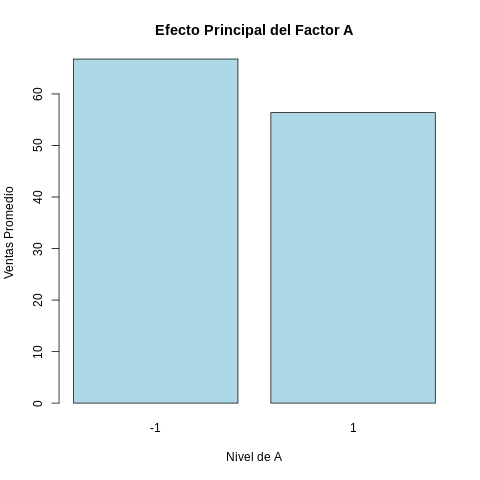

In [ ]:
%%R
# Calcular la media de las ventas para cada nivel de los factores
efecto_A <- aggregate(Ventas ~ A, data = datos, mean)
efecto_B <- aggregate(Ventas ~ B, data = datos, mean)
efecto_C <- aggregate(Ventas ~ C, data = datos, mean)
efecto_D <- aggregate(Ventas ~ D, data = datos, mean)
efecto_E <- aggregate(Ventas ~ E, data = datos, mean)

# Gráfico de barras para el efecto del factor A
barplot(efecto_A$Ventas, names.arg = efecto_A$A, main = "Efecto Principal del Factor A",
        xlab = "Nivel de A", ylab = "Ventas Promedio", col = "lightblue")

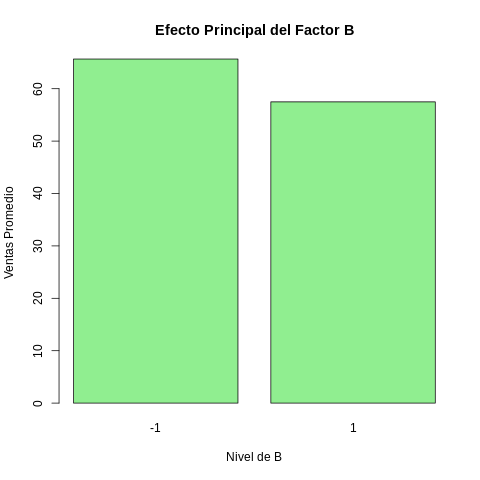

In [ ]:
%%R
# Gráfico de barras para el efecto del factor B
barplot(efecto_B$Ventas, names.arg = efecto_B$B, main = "Efecto Principal del Factor B",
        xlab = "Nivel de B", ylab = "Ventas Promedio", col = "lightgreen")

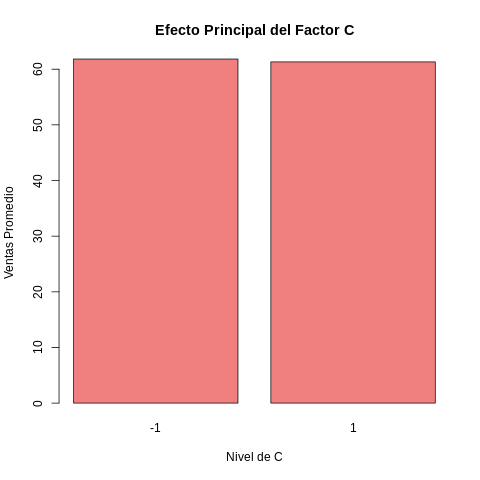

In [ ]:
%%R
# Gráfico de barras para el efecto del factor C
barplot(efecto_C$Ventas, names.arg = efecto_C$C, main = "Efecto Principal del Factor C",
        xlab = "Nivel de C", ylab = "Ventas Promedio", col = "lightcoral")

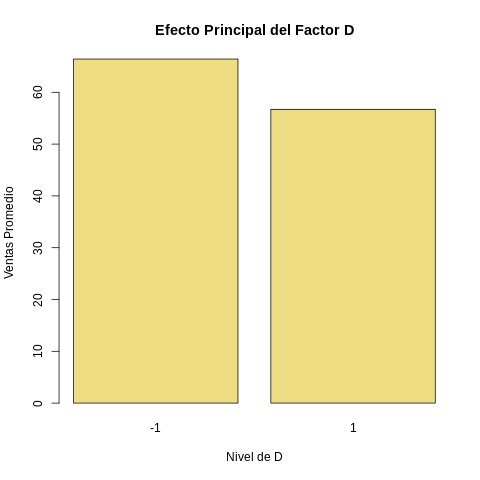

In [ ]:
%%R
# Gráfico de barras para el efecto del factor D
barplot(efecto_D$Ventas, names.arg = efecto_D$D, main = "Efecto Principal del Factor D",
        xlab = "Nivel de D", ylab = "Ventas Promedio", col = "lightgoldenrod")

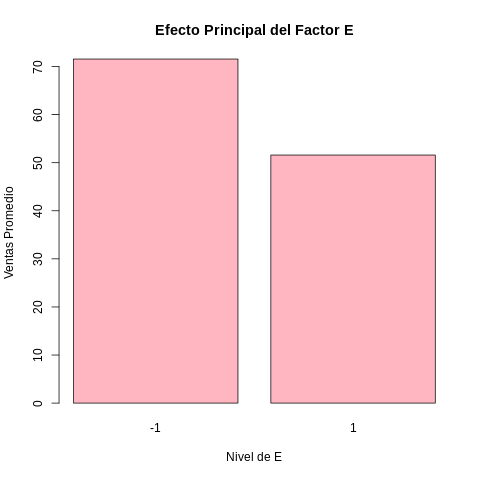

In [ ]:
%%R
# Gráfico de barras para el efecto del factor E
barplot(efecto_E$Ventas, names.arg = efecto_E$E, main = "Efecto Principal del Factor E",
        xlab = "Nivel de E", ylab = "Ventas Promedio", col = "lightpink")

#### Interacciones Significativas

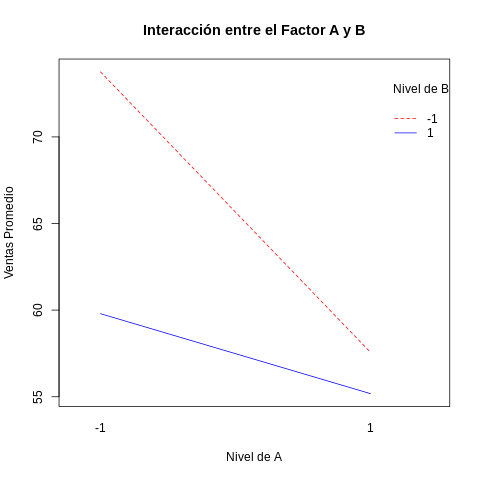

In [ ]:
%%R
# Gráfico de interacción entre los factores A y B
interaction.plot(datos$A, datos$B, datos$Ventas,
                 col = c("red", "blue"), pch = c(16, 18),
                 main = "Interacción entre el Factor A y B",
                 xlab = "Nivel de A", ylab = "Ventas Promedio", trace.label = "Nivel de B")

# Puedes crear gráficos similares para otras interacciones significativas


### Gráficos con ggplot2

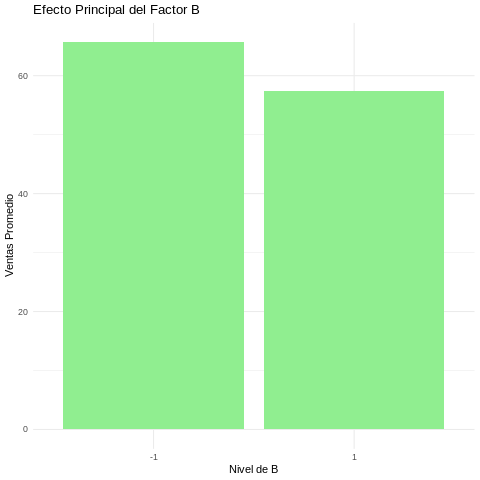

In [ ]:
%%R
# Cargar el paquete ggplot2
library(ggplot2)

# Gráfico de efectos principales para el factor A
ggplot(datos, aes(x = as.factor(A), y = Ventas)) +
  geom_bar(stat = "summary", fun = "mean", fill = "lightblue") +
  labs(title = "Efecto Principal del Factor A", x = "Nivel de A", y = "Ventas Promedio") +
  theme_minimal()

# Gráfico de efectos principales para el factor B
ggplot(datos, aes(x = as.factor(B), y = Ventas)) +
  geom_bar(stat = "summary", fun = "mean", fill = "lightgreen") +
  labs(title = "Efecto Principal del Factor B", x = "Nivel de B", y = "Ventas Promedio") +
  theme_minimal()


### Gráficos de Interacción Avanzados

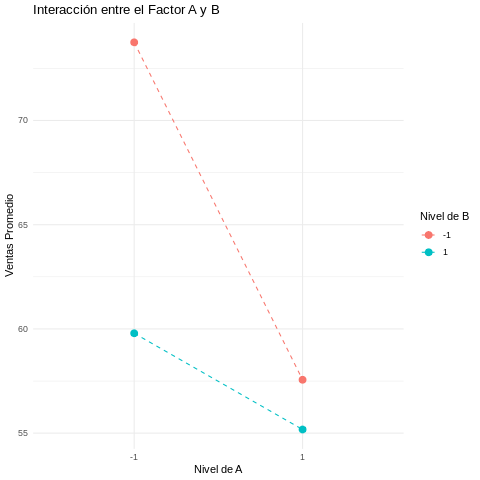

In [ ]:
%%R
# Gráfico de interacción entre los factores A y B
ggplot(datos, aes(x = as.factor(A), y = Ventas, color = as.factor(B))) +
  geom_point(stat = "summary", fun = "mean", size = 3) +
  geom_line(stat = "summary", fun = "mean", aes(group = B), linetype = "dashed") +
  labs(title = "Interacción entre el Factor A y B", x = "Nivel de A", y = "Ventas Promedio", color = "Nivel de B") +
  theme_minimal()


In [ ]:
%%R
# Instalar el paquete reshape2 y otras dependencias si es necesario
install.packages("reshape2", repos = "http://cran.rstudio.com/")
library(reshape2)


(as ‘lib’ is unspecified)














	‘/tmp/RtmpblswCo/downloaded_packages’

Attaching package: ‘reshape2’



    smiths




In [ ]:
%%R
# Reinstalar paquetes problemáticos
install.packages("feather", repos = "http://cran.rstudio.com/")


(as ‘lib’ is unspecified)







	‘/tmp/RtmpblswCo/downloaded_packages’



### Heatmaps y Gráficos de Superficie

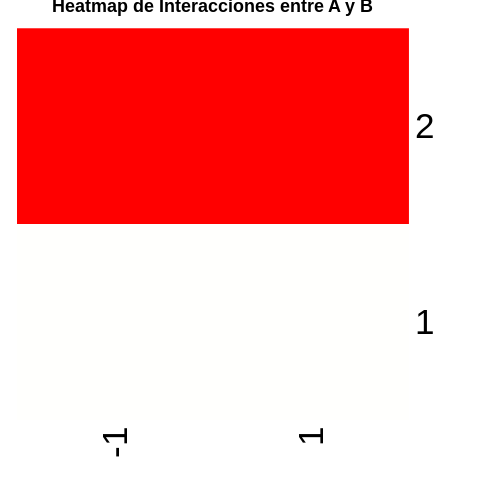

In [ ]:
%%R
# Crear un heatmap para mostrar las interacciones entre A y B
library(reshape2)
heatmap_data <- dcast(datos, A ~ B, value.var = "Ventas", fun.aggregate = mean)
heatmap(as.matrix(heatmap_data[,-1]), Rowv = NA, Colv = NA, col = heat.colors(256), scale = "column",
        main = "Heatmap de Interacciones entre A y B")
